##### [< Forrige](4%20-%20lister%2C%20oppslag%20og%20numpy.ipynb)     |     [Neste >](http://localhost:8888/notebooks/6%20-%20Logikk%2C%20betingelser%2C%20filtrering%20og%20pandas.ipynb)

# 5 - Sympy

Sympy er en veldig nyttig pakke innenfor samfunnsøknomi. Med den kan vi regne analytisk, det vil si med symboler. I samfunnsøknomi bruker vi mye matematikk som denne pakken kan hjelpe oss med. Vi starter med et eksempel på utregning av profittmaksimum:

## Eksempel med optimal mengde arbeidskraft

Anta at du er bedriftsleder, og lurer på hvor mange medarbeidere du skal ansette. For en gitt mengde arbeidskraft produseres

#### Eksempel 1:

In [1]:
def f(L,a):
    return 60*L**a

`a` definerer produktiviteten til de ansatte. Desto høyere `a` er, desto mer produktive er de ansatte. Vi kan plotte denne funksjonen:

#### Eksempel 2:

Text(0, 0.5, 'Produksjon')

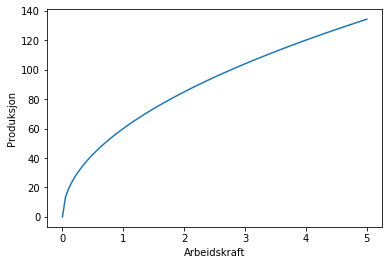

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,5,100)

plt.plot(x,f(x,0.5))
plt.xlabel('Arbeidskraft')
plt.ylabel('Produksjon')

Som vi ser er produktiviteten avtakende, kurven stiger mindre utover i diagrammet. Det er fordi `a` er mindre enn én. (Forsøk med andre tall for `a`!)

Når produktfunksjonen er definert, kan vi definere fortjenesten til bedriften, eller "profittfunksjonen" som vi gjerne kaller det i samfunnsøkonomi. La oss si at bedriften betaler hver arbeider `w` tusen kroner, og at faste utgifter er `K`. 

Fortenesten er pris ganger solgt mengde, `p*f(L,a)` og kostnadene er lønnskostnader `w*L` og faste utgifter `K`. Profittfunksjonen blir da

#### Eksempel 3:

In [18]:
def profit(L,a,w,p,K):
    return p*f(L,a)-w*L-K

La oss se på den grafisk. Dersom prisen per enhet er hundre kroner, lønna er 2 500 per dag og bedriften har 300 000 i faste utgifter per dag, så ser profittfunksjonen slik ut:

#### Eksempel 4:

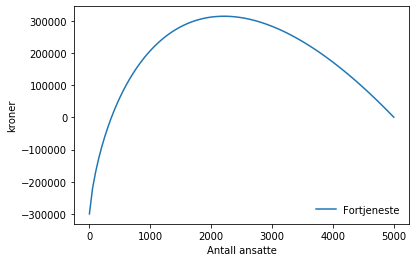

In [33]:
import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt
import numpy as np

#creating the plot
x = np.linspace(0,5000,100)
fig,ax=plt.subplots()
ax.set_ylabel('kroner')
ax.set_xlabel('Antall ansatte')


#plotting the function
plt.plot(x,profit(x,0.9,2500,100,300000),label='Fortjeneste')
ax.legend(loc='lower right',frameon=False)

Vi bruker metoden med `fig,ax=plt.subplots()`, siden vi skal bygge på denne grafen. 

Vi skal nå begynne å bruke sympy. Det første vi må gjøre er å definere hvilke symboler som skal behandles analytisk (altså som symboler og ikke flyttall). Det gjør vi slik:

#### Eksempel 5:

In [20]:
import sympy as sp
L,a,w,p,K=sp.symbols("L a w p K")

Med symbolene definert, vil nå vår profittfunksjon vises analytisk når vi bruker de definere symbolene:


#### Eksempel 6:

In [21]:
profit(L,a,w,p,K)

-K - L*w + 60*L**a*p

Vi ønsker å finne ut for hvilken arbeidskraft fortjenesten er størst. Det er det høyeste punktet i figuren fra Eksempel 3. På dette punktet har profittfunksjonen ingen stigning, slik at den deriverte er null. For å finne dette punktet må vi først finne den *deriverte*. Det gjør vi i sympy med funksjonen `diff()`. Den tar to argumenter. Det første er funksjonen, det andre er den variabel vi ønsker å derivere med hensyn til. 

Som vi ser av figuren i Eksempel 3, så har vi arbeidskraft `L` langs x-aksen, så det er denne variabelen vi ønsker å derivere med hensyn til. Den deriverte av `profitt()` med hensyn til `L` er dermed:

#### Eksempel 7:

In [22]:
d_profitt=sp.diff(profit(L,a,w,p,K),L)
d_profitt

-w + 60*L**a*a*p/L

### Løser førsteordensbetingelsen

For å finne punktet der denne deriverte er null, setter vi opp en ligning der den deriverte er null, og løser for den `L` som tilfredstiller ligningen. En slik ligning kalles "førsteordensbetingelse", eller "first order condition" på engelsk. Vi forkorter den derfor til "foc":

#### Eksempel 8:

In [23]:
foc=sp.Eq(d_profitt,0)
foc

Eq(-w + 60*L**a*a*p/L, 0)

Vi kan nå løse førsteordensbetingelsen med funksjonen `solve`, som ligger i modulen `solvers`i sympy:

#### Eksempel 9:

In [24]:
from sympy.solvers import solve
L_max=solve(foc,L)[0]
L_max

(60*a*p/w)**(-1/(a - 1))

Legg merke til at resultatet ligger i en liste med lengde 1, så vi må hente ut element 0 i listen for å vise resultatet. Vi kan finne hva den analytiske verdien er i maksimum ved å sette `L_max`inn i profittfunksjonen:

#### Eksempel 10:

In [25]:
profit_max=profit(L_max,a,w,p,K)

Vi kan nå beregne de nummeriske verdiene ved å sette inn noen passende tall for de ukjente symbolene. Vi prøver med 0.5 for produktivitet `a`, 0.3 for lønn `w`, 1 for prise `p` og 1 for kapital `K`. Vi forteller sympy om at vi ønsker å bruke dise verdiene ved å lage et oppslag der hvert av symbolene er nøkkel til hver av de nummeriske verdiene:

#### Eksempel 11:

In [26]:
num_dict={a:0.9,w:2500,p:100,K:300000}

Vi kan nå finne nummerisk hvor mye arbeidskraft som trengs for å oppnå maksimal fortjeneste:

#### Eksempel 12:

In [27]:
L_max.subs(num_dict)

2210.73919720734

Om vi nå legger dette tallet inn for symbol `L`, kan vi finne hvor stor fortjenesten er i dette punktet. Vi starter med å legge inn verdien for L som gir maksimal fortjeneste:

#### Eksempel 13:

In [28]:
num_dict[L]=L_max.subs(num_dict)
num_dict

{a: 0.9, w: 2500, p: 100, K: 300000, L: 2210.73919720734}

Med det oppdaterte oppslaget blir fortjenesten

#### Eksempel 14:

In [29]:
profit_max_num=profit(L,a,w,p,K).subs(num_dict)
profit_max_num

314094.221446482

Med modulene `display`og `Markdown`fra `IPython` (pakken som driver Jupyter), kan vi sette dette in i en pen tabell:

#### Eksempel 15:

In [30]:
from IPython.display import display, Markdown

tbl=f"""
|                                 | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------------------| :----------------------------------------| :-----------------------------| 
| Optimal mengde arbeidskraft:     | ${np.round(float(num_dict[L]),1)}$         |${sp.latex(L_max)}$            | 
| Maksimal profitt                | ${np.round(float(profit_max_num),1)}$    |${sp.latex(profit_max)}$       | 

"""
display(Markdown(tbl))


|                                 | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------------------| :----------------------------------------| :-----------------------------| 
| Optimal mengde arbeidskraft:     | $2210.7$         |$\left(\frac{60 a p}{w}\right)^{- \frac{1}{a - 1}}$            | 
| Maksimal profitt                | $314094.2$    |$- K + 60 p \left(\left(\frac{60 a p}{w}\right)^{- \frac{1}{a - 1}}\right)^{a} - w \left(\frac{60 a p}{w}\right)^{- \frac{1}{a - 1}}$       | 



La oss nå plotte løstningen. Vi plotter her følgende, i rekkefølge:
1. Den opprinnelige profittfunksjonen
2. Den horisontale tangenten som tangerer i maksimumspunktet
3. En vertikal linje som viser mengden arbeidskraft i optimum. 

Legg merke til at vi legger inn verdiene vi har definert i `num_dict` inn i profittfunksjonen. Generelt er det en god idé i programmering å "hardkode" tall minst mulig. Definer det heller tallet som en variabel eller element i en `dict`og referer til det senere. 

#### Eksempel 16:

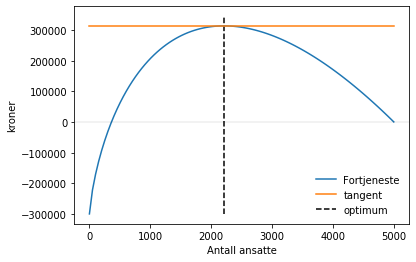

In [34]:

ax.plot(x,
        profit_max_num*np.ones(len(x)),
        label='tangent')
ax.vlines(float(L_max.subs(num_dict)), 
          -300000, 
          profit_max_num*1.1,
          colors=['black'],
          linestyles='dashed',
          label='optimum')

ax.legend(loc='lower right',frameon=False)
ax.axhline(0, color='black',lw=0.1)
fig

# Eksempel med tilbud og etterspørsel

I forelesning 3 definerte vi disse tilbuds og etterspørselsfunksjonene:

#### Eksempel 17:

In [ ]:
def supply(x):
    return (x**2)*(1/250)
    
def demand(x):
    return 3000/(100+x)

Og vi tegnet dem slik:

#### Eksempel 18:

In [ ]:
#drawing 100 points in the interval 0.0 to 100
q = np.linspace(1,100,100)

#creating the plot
q = np.linspace(0,100,100)
fig,ax=plt.subplots()
ax.set_ylabel('Pris')
ax.set_xlabel('Enheter')


#drawing supply
ax.plot(q,supply(q),label='Tilbud')

#drawing demand
ax.plot(q,demand(q),color='green',label='Etterspørsel')

#adding legend:
ax.legend(loc='upper center',frameon=False)


Vi løste da likevekten grafisk, ved å se sånn cirka hvor tilbud er lik etterspørsel. Med sympy kan vi la python regne ut dette, og konsument og produsentoverskudd. Vi gjør dette ved å definere mengde `x` som en eksogen variabel, og sette opp ligningen vi trenger, altså at tilbud skal være lik etterspørsel:

#### Eksempel 19:

In [ ]:
x=sp.symbols('x')
eq_cond=sp.Eq(demand(x),supply(x))
eq_cond

Vi kan nå løse dette med solve fra sympy, som i forrige eksempel:

#### Eksempel 20:

In [ ]:
x_eq=solve(eq_cond,x)
x_eq

Bare én av disse løsningene er gyldige. De to siste i listen `x_eq`er såkalte "imaginære tall", det ser vi av `I`'en. Vi går ikke lenger inn på hva dette er her, men nøyer oss med å si at en likevekt ikke kan være et imaginært tall. Løsningen er altså `x_eq[0]`. Vi kan sette denne inn i enten tilbuds eller etterspørselfunksjonen for å få likevektsprisen 

#### Eksempel 21:

In [ ]:
p_eq=demand(x_eq[0])
print(f"""
Likevektspris er {p_eq}
Likevektskvantum er {x_eq[0]}
""")

Etterspørselskurven kan ses på som en rekke med konsumenter med ulik betalingsvilje i fallende rekkefølge. Alle konsumentene som betaler `p_eq` har dermed et overskudd som er lik differansen mellom `p_eq` og konsumentens punkt på etterspørselskurven. Summen av alle konsumentenes overskudd kalles konsumentoverskuddet. Dette kan illustreres ved å legge  et skravert område til figuren over

#### Eksempel 22:

In [ ]:
q = np.linspace(0,float(x_eq[0]),100)
ax.fill_between(q,float(p_eq),demand(q), color = "pink",alpha = 0.3,label='Konsumentoverskudd')
ax.legend(loc='upper center',frameon=False)
fig

Akkrat som at vi kan regnet ut skjæringspunktet med sympy, så kan vi regne ut det skraverte konsumentoverskuddet. Vi bruker da det vi har lært i matematikkurset; arealet under en funksjon er integralet til funksjonen. Vi skal finne arealet under etterspørselsfunksjonen `demand(x)`, men kun ned til prisen `p_eq`, så vi integrer differansen `demand(x)-p_eq`. Dette gjør vi for alle omsatte enheter, altså frem til omsatt kvantum `x_eq[0]`. 

Vi skal altså integrere  `demand(x)-p_eq` i intervalet 0 til `x_eq[0]`. Det kan vi gjøre i sympy slik:

#### Eksempel 23:

In [ ]:
consumer_surplus=sp.integrate(demand(x)-float(p_eq),(x,0,x_eq[0]))
consumer_surplus

På samme måte er *produsentoverskuddet* arealet over tilbuskurven, opp til prisen, altså det gule området i figuren under

#### Eksempel 24:

In [ ]:
ax.fill_between(q,supply(q),float(p_eq), color = "yellow",alpha = 0.3,label='Produsentoverskudd')
ax.vlines(float(x_eq[0]), 0, 25,colors=['black'],linestyles='dashed', label='x_eq[0]')
ax.legend(loc='upper center',frameon=False)
fig

Vi kan regne ut dette område også, som altså er integralet av differansen mellom prisen og tilbudskruven, frem til  `x_eq[0]`.

#### Eksempel 25:

In [ ]:
producer_surplus=sp.integrate(p_eq-supply(x),(x,0,x_eq[0]))
producer_surplus

Summen av produsentoverskuddet og konsumentoversdkuddet kalles "velferdsgevinsten". Vi kan finne den ved å legge sammen konsument- og produsentoverskudd:

#### Eksempel 26:

In [ ]:
producer_surpluss+consumer_surpluss

Eller ved å ta integralet av differansen mellom etterspørsel og tilbud:

#### Eksempel 27:

In [ ]:
welfare_surplus=sp.integrate(demand(x)-supply(x),(x,0,x_eq[0]))
welfare_surplus

Vi kan nå lage en tabell som oppsumerer resultatene:

#### Eksempel 28:

In [ ]:
tbl=f"""
|                     | Verdi                                    |
| :-------------------| :----------------------------------------|
| Solgt mengde:       | ${np.round(float(x_eq[0]),1)}$           |
| Pris:               | ${np.round(float(p_eq),1)}$              |
| Verdiskapning:      | ${np.round(float(welfare_surpluss),1)}$  |
| Konsumentoverskudd: | ${np.round(float(consumer_surpluss),1)}$ | 
| Produsentoverskudd: | ${np.round(float(producer_surpluss),1)}$ | 
| Velferdsgevinst:    | ${np.round(float(welfare_surplus),1)}$   | 
"""
display(Markdown(tbl))

## Oppgaver

Løs oppgavene 15, 16, 17 og 19-23 i "Læresteg" i BED-1007 (se canvas for BED-1007), ved bruk av Sympy

##### [< Forrige](4%20-%20lister%2C%20oppslag%20og%20numpy.ipynb)     |     [Neste >](http://localhost:8888/notebooks/6%20-%20Logikk%2C%20betingelser%2C%20filtrering%20og%20pandas.ipynb)